In [ ]:
"""
Purpose: To take in a whole neuron that could have any number of somas
and then to split it into multiple neuron objects

Pseudocode: 
1) Get all of the split suggestions
2) Split all of the limbs that need splitting
3) Once have split the limbs, split the neuron object into mutliple objects


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [32]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

import system_utils as su

In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-03 23:20:55,375 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-03 23:20:55,615 - settings - Setting enable_python_native_blobs to True


# Picking the Neuron

In [172]:
minnie.Decomposition() & "n_error_limbs>2"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135081644023,0,0.25,=BLOB=,853714,1717788,3,2,2,2,12,274,133,9153647.235968873,3241695.1367920083,19845.782,148.853,147.244,444.527,417.096,3462,0.0003782098993717189,12.635036496350365,6075226.747,137,0.0005698552735845729,25.27,247942694346.279,43604637.473335266,27086.765302905555,40812.088942806164,1809800688.6589708,3245.9033
864691135269718693,0,0.25,=BLOB=,1182832,2399429,5,4,1,2,19,397,137,10407459.124297608,3856704.1972677987,13244.755,129.46,129.46,599.187,583.497,3033,0.0002914255981000257,7.6397984886649875,6526212.816,184,0.00046474120374440455,16.484,132060363163.22937,27028301.798009235,12689.010985872312,20235.374923640764,717719365.017551,5913.3317
864691135307114822,0,0.25,=BLOB=,1206734,2471803,4,4,1,2,9,444,131,13569727.507996578,3796699.9968538154,17976.693,106.656,106.656,444.295,365.512,4965,0.00036588796621554476,11.182432432432432,7454589.124,213,0.0006660326836814139,23.31,202705476814.51703,15992281.517499287,14938.065388200583,27192.038815648215,951668905.2324743,4548.8046
864691135334512105,0,0.25,=BLOB=,1284668,2592422,3,2,2,2,14,390,135,12118342.18634784,4130159.9831832303,17029.776,179.18,178.75,511.307,438.91,5564,0.0004591387101008119,14.266666666666667,7902876.052,204,0.0007040474839020036,27.275,365063326308.1942,38873395.731487274,30124.857071577295,46193.730473073374,1789526109.3538933,5440.6827
864691135337716966,0,0.25,=BLOB=,901090,1830584,4,2,2,2,16,322,100,10373163.969724864,2639103.963311551,16708.922,116.589,116.589,459.545,418.926,3171,0.0003056926516591164,9.847826086956522,6575944.137,151,0.0004822121255802876,21.0,160615334468.71616,31605330.430010475,15483.736200207417,24424.680490365325,1063677711.7133521,3769.0997
864691135385256533,0,0.25,=BLOB=,1026242,2084571,3,2,1,2,14,335,98,9823640.051968744,2994725.227375103,17055.651,194.111,191.0,491.096,394.241,4901,0.0004988985726342647,14.629850746268657,7183900.555,195,0.0006822199113807193,25.133,292604904227.00366,35944362.30916786,29785.792504517005,40730.64514003475,1500537970.3948905,4003.6034
864691135758516046,0,0.25,=BLOB=,1389966,2818295,3,2,1,2,11,388,127,12034808.273364484,3767464.6397259166,18770.024,318.836,274.846,500.967,461.257,6919,0.0005749156814831173,17.832474226804123,1039

In [249]:
segment_id = 864691135269718693 
segment_id = 864691135939325185

In [250]:
neuron = reload(neuron)
neuron_obj = (minnie.Decomposition & dict(segment_id=segment_id)).fetch1("decomposition")
neuron_obj

Decompressing Neuron in minimal output mode...please wait


# Using a previously processed Neuron

In [20]:
# file_loc = "/notebooks/test_neurons/Segmentation_3/Multi_Soma/864691135207768697_0_25"
# neuron_obj = nru.decompress_neuron(file_loc,file_loc)

# Visualizing the Neuron

In [175]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all",
                     mesh_whole_neuron=False)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [245]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(),
                     mesh_whole_neuron=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Preview of How th Neuron Will Need to be Split

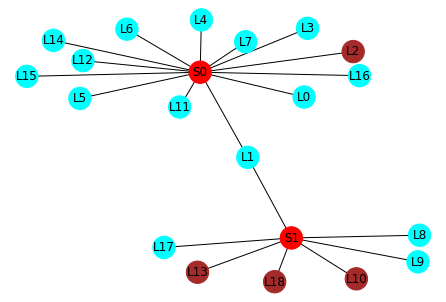

In [224]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [178]:
neuron_obj.same_soma_multi_touching_limbs

array([ 2, 10, 13, 18])

In [179]:
total_limbs_to_process = nru.error_limbs(neuron_obj)
total_limbs_to_process

array([ 1,  2, 10, 13, 18])

# Getting the Split Suggestions

In [225]:
neuron_obj = neuron.Neuron(neuron_obj)

Recieved another instance of Neuron class in init -- so just copying data


In [238]:
import networkx as nx
nx.number_connected_components(neuron_obj[1].concept_network)

1

In [248]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L1=[5, 7, 11]))


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [247]:
nviz.plot_objects(neuron_obj[1][].mesh)

multi_soma_limbs = [1]
multi_touch_limbs = [ 2 10 13 18]


 -------- Working on limb 1------------
Starting combinations to process = [(5, 48)]


---- working on disconnecting 5 and 48
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Shortest path = [5, 7, 11, 48]

 --------- START OF GET BEST EDGE --------- 
Short segments to combine = []
Found 1 high degree coordinates to cut
Picking [871224. 833182. 653207.] high degree coordinates to cut
coordinate_branches = [5, 7, 8, 9]
5 = red
7 = aqua
8 = purple
9 = green


Angle between 5 and 7 = 14.18 
Angle between 5 and 8 = 28.17 
Angle between 5 and 9 = 91.42 
Angle between 7 and 8 = 137.7 
Angle between 7 and 9 = 75.14 
Angle between 8 and 9 = 116.08 
Final Matches = [[5, 7], [5, 8]]
matched_branches_revised = [[5, 7]]
Aligned Skeleton Parts


Original graph


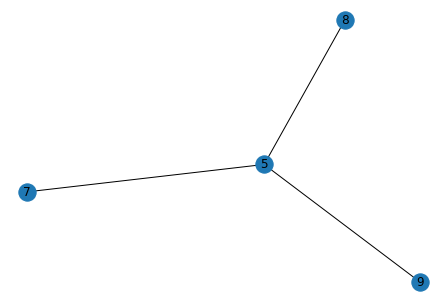

edges_to_delete (resolve crossover) = [array([5, 8]), array([5, 9])]
edges_to_create (resolve crossover) = []
Skipping endnode 48 because skeletal distance was 333.01628065675976 and threshold was 2500
skip_nodes = [48]
edges_to_delete (cut_limb_network) = [array([5, 8]), array([5, 9])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 19, 20, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128.0, 129, 130, 131, 132, 133, 134, 135, 136}
Comp 1 = {0, 8, 43, 44, 47, 50, 51, 21, 22, 23, 24, 30}
Comp 2 = {9, 17, 18, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46}
After get best cut: cut_edges = [array([5, 8]), a

Angle between 5 and 7 = 14.18 
Angle between 5 and 8 = 28.17 
Angle between 5 and 9 = 91.42 
Angle between 7 and 8 = 137.7 
Angle between 7 and 9 = 75.14 
Angle between 8 and 9 = 116.08 
Final Matches = [[5, 7], [5, 8]]
matched_branches_revised = [[5, 7]]
Aligned Skeleton Parts


Original graph


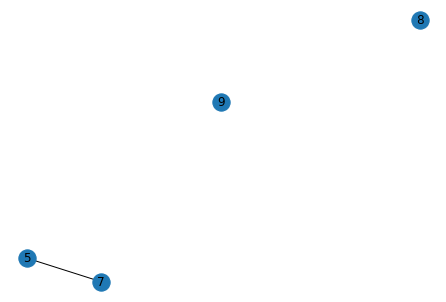

edges_to_delete (resolve crossover) = []
edges_to_create (resolve crossover) = []
Skipping endnode 48 because skeletal distance was 333.01628065675976 and threshold was 2500
skip_nodes = [48]

Attempting the doubling back check (symmetrical so don't need to check from both sides)
  Edge: [5 7]: curr_angle = 14.56
  Edge: [ 7 11]: curr_angle = 27.35
Total time for doubling_back = 0.3510103225708008

Attempting the width jump check (attempting from both sides)
  Edge: [5 7]: jump = -41.91
  Edge: [ 7 11]: jump = -12.07
Total time for width = 0.35141634941101074
Path starting at 5 had err_edges: []
  Edge: [11  7]: jump = 12.07
  Edge: [7 5]: jump = 41.91
Total time for width = 0.3511230945587158
Path starting at 48 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43

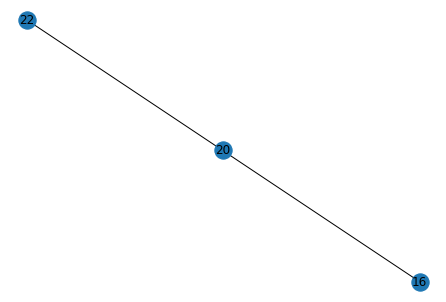

edges_to_delete (resolve crossover) = [[16 20]
 [20 22]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([16, 20]), array([20, 22])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 18, 19, 20, 21}
Comp 1 = {16, 17, 14}
Comp 2 = {22}
After get best cut: cut_edges = [array([16, 20]), array([20, 22])], added_edges = []
-----------counter = 0------------
 Cut iteration 1
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3


 -------- Working on limb 10------------
Starting combinations to process = [(18, 18)]


---- working on disconnecting 18 and 18
---- This disconnects S1_1 from S1_1  
 Cut iteration 0
Shortest path = [18]

 --------- START OF GET BEST EDGE --------- 
Short segments to combine = []
Found 0 high degree coordinates to cut
Skipping endnode 18 because skeletal distance was 666.2462022237575 and threshold was 2500
Skipping e

Angle between 1 and 2 = 118.13 
Angle between 1 and 5 = 37.86 
Angle between 1 and 6 = 88.52 
Angle between 2 and 5 = 98.77 
Angle between 2 and 6 = 27.08 
Angle between 5 and 6 = 54.18 
Final Matches = [[2, 6]]
matched_branches_revised = [[2, 6]]
Aligned Skeleton Parts


Original graph


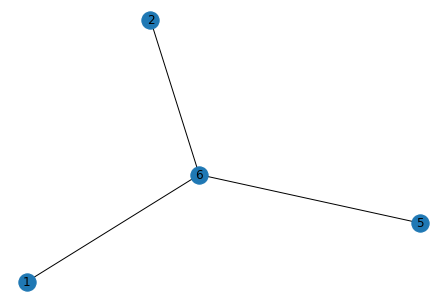

edges_to_delete (resolve crossover) = [array([1, 6]), array([5, 6])]
edges_to_create (resolve crossover) = []
skip_nodes = []
edges_to_delete (cut_limb_network) = [array([1, 6]), array([5, 6])]
edges_to_create = []
Number of connected components = 4
Comp 0 = {0, 2, 3, 4, 6, 8, 9, 10}
Comp 1 = {1}
Comp 2 = {5}
Comp 3 = {7}
After get best cut: cut_edges = [array([1, 6]), array([5, 6])], added_edges = []
-----------counter = 0------------
 Cut iteration 1
Shortest path = [0, 9, 6, 2]

 --------- START OF GET BEST EDGE --------- 
Short segments to combine = []
Found 3 high degree coordinates to cut
Picking [ 946334.97620223 1051472.06136683  761963.90181678] high degree coordinates to cut
coordinate_branches = [1, 2, 5, 6]
1 = red
2 = aqua
5 = purple
6 = green


Angle between 1 and 2 = 118.13 
Angle between 1 and 5 = 37.86 
Angle between 1 and 6 = 88.52 
Angle between 2 and 5 = 98.77 
Angle between 2 and 6 = 27.08 
Angle between 5 and 6 = 54.18 
Final Matches = [[2, 6]]
matched_branches_revised = [[2, 6]]
Aligned Skeleton Parts


Original graph


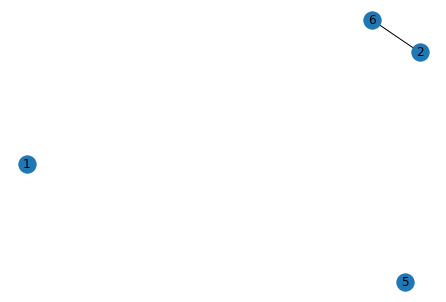

edges_to_delete (resolve crossover) = []
edges_to_create (resolve crossover) = []
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)
  Edge: [0 9]: curr_angle = 99.07
  Edge: [9 6]: curr_angle = 149.24
  Edge: [6 2]: curr_angle = 126.0
Total time for doubling_back = 0.06084918975830078
There were 2 edges that passed doubling back threshold of 100
Winning edge [9 6] had a doubling back of 149.23997144805227
edges_to_delete (cut_limb_network) = [array([9, 6])]
Number of connected components = 5
Comp 0 = {0, 3, 4, 8, 9, 10}
Comp 1 = {2, 6}
Comp 2 = {1}
Comp 3 = {5}
Comp 4 = {7}
After get best cut: cut_edges = [array([9, 6])], added_edges = []
-----------counter = 1------------
 Cut iteration 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 5


 -------- Working on limb 18------------
Starting combinations to process = [(0, 0)]


---- working on disconnecting 0 and 0
---- This disconnec

In [237]:
import proofreading_utils as pru
limb_results = pru.multi_soma_split_suggestions(neuron_obj,
                                verbose=True,
                                plot_intermediates=True,
                                )

# Plotting the Results

In [240]:
limb_results[]

[autoreload of neuron_visualizations failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/meshAfterParty/neuron_visualizations.py", line 1844
    if
      ^
Synta

{1: [{'starting_node_1': 5,
   'starting_node_2': 48,
   'title': 'S0_0 from S1_0 ',
   'edges_to_delete': [array([5, 8]), array([5, 9])],
   'edges_to_create': [],
   'removed_branches': [],
   'coordinate_suggestions': [array([871224., 833182., 653207.]),
    array([871224., 833182., 653207.])],
   'successful_disconnection': False}],
 2: [{'starting_node_1': 10,
   'starting_node_2': 14,
   'title': 'S0_0 from S0_1 ',
   'edges_to_delete': [array([16, 20]), array([20, 22])],
   'edges_to_create': [],
   'removed_branches': [],
   'coordinate_suggestions': [array([879374., 775322., 664037.]),
    array([879374., 775322., 664037.])],
   'successful_disconnection': True}],
 10: [{'starting_node_1': 18,
   'starting_node_2': 18,
   'title': 'S1_1 from S1_1 ',
   'edges_to_delete': [],
   'edges_to_create': [],
   'removed_branches': [],
   'coordinate_suggestions': [],
   'successful_disconnection': False}],
 13: [{'starting_node_1': 0,
   'starting_node_2': 2,
   'title': 'S1_0 from S1

In [244]:
pru = reload(pru)
nviz = reload(nviz)
nviz.plot_split_suggestions_per_limb(neuron_obj,limb_results)



-------- Suggestions for Limb 1------

 Working on visualization type: mesh

 Working on visualization type: skeleton




-------- Suggestions for Limb 2------

 Working on visualization type: mesh

 Working on visualization type: skeleton




-------- Suggestions for Limb 10------


 No suggested cuts for this limb!!

 Working on visualization type: mesh

 Working on visualization type: skeleton




-------- Suggestions for Limb 13------

 Working on visualization type: mesh

 Working on visualization type: skeleton




-------- Suggestions for Limb 18------


 No suggested cuts for this limb!!

 Working on visualization type: mesh

 Working on visualization type: skeleton
